In [1]:
from fitparse import FitFile
def get_activity_type(filepath: str):
    fitfile = FitFile(filepath)

    # "sport" message usually holds activity type
    for msg in fitfile.get_messages("sport"):
        for field in msg:
            if field.name == "sport":
                return field.value

    # sometimes stored in "session" instead
    for msg in fitfile.get_messages("session"):
        for field in msg:
            if field.name == "sport":
                return field.value

    return None

In [3]:
from pathlib import Path

fit_folder = Path("./luiza_raw_fits")

cycling_fits = []
running_fits = []

for fit_file in fit_folder.glob("*.FIT"):
    activity_type = get_activity_type(str(fit_file))
    if activity_type == "cycling":
        # add filename to cycling list
        cycling_fits.append(fit_file.name)
    elif activity_type == "running":
        # add file to running list
        running_fits.append(fit_file.name)
    else:
        continue


print(cycling_fits)
print(running_fits)


['tp-5048590.2024-07-17-19-11-35-907Z.GarminPing.AAAAAGaYF2cM9O3m.FIT', 'tp-5048590.2024-07-22-20-19-46-440Z.GarminPing.AAAAAGaevuIFNW84.FIT', 'tp-5048590.2025-08-18-09-03-41-938Z.GarminPing.AAAAAGii7G3bZ2Up.FIT', 'tp-5048590.2025-07-21-15-30-58-279Z.GarminPing.AAAAAGh-XTFkXoGJ.FIT', 'tp-5048590.2024-07-03-19-00-55-890Z.GarminPing.AAAAAGaFn-dJZhEK.FIT', 'tp-5048590.2024-06-24-17-32-07-311Z.GarminPing.AAAAAGZ5rZe9rdhE.FIT', 'tp-5048590.2024-08-16-13-19-08-098Z.GarminPing.AAAAAGa_UctrxiBA.FIT', 'tp-5048590.2024-08-18-19-46-14-632Z.GarminPing.AAAAAGbCT4aLHr0K.FIT', 'tp-5048590.2024-08-23-16-40-19-210Z.GarminPing.AAAAAGbIu3LA9sWr.FIT', 'tp-5048590.2025-08-07-11-32-36-058Z.GarminPing.AAAAAGiUjtNcH0QK.FIT', 'tp-5048590.2024-10-28-19-44-37-593Z.GarminPing.AAAAAGcf6aUP_MHG.FIT', 'tp-5048590.2024-07-03-19-00-29-400Z.GarminPing.AAAAAGaFn80DVNii.FIT', 'tp-5048590.2024-09-09-17-33-28-247Z.GarminPing.AAAAAGbfMWcsW5Od.FIT', 'tp-5048590.2024-06-08-14-53-45-286Z.GarminPing.AAAAAGZkcHgXjqzU.FIT', 'tp-5

Open all fit files in data folder

In [5]:
import pandas as pd

def fit_to_dataframe(filepath: str) -> pd.DataFrame:

    fitfile = FitFile(filepath)

    records = []
    for record in fitfile.get_messages("record"):
        data = {}
        for field in record:
            data[field.name] = field.value
        records.append(data)

    df = pd.DataFrame(records)

    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
        df = df.sort_values("timestamp").set_index("timestamp")

    return df

running_dfs = {}

for idx, fit in enumerate(running_fits):
    running_dfs[f"df{idx}"] = fit_to_dataframe(f"luiza_raw_fits/{fit}")

cycling_dfs = {}

for idx, fit in enumerate(cycling_fits):
    cycling_dfs[f"df{idx}"] = fit_to_dataframe(f"luiza_raw_fits/{fit}")


In [6]:



for name, df in running_dfs.items():
    print(f"{name}: {df.shape}")



df0: (780, 13)
df1: (679, 9)
df2: (664, 13)
df3: (466, 13)
df4: (1918, 13)
df5: (1986, 13)
df6: (130, 13)
df7: (769, 13)
df8: (585, 13)
df9: (823, 13)
df10: (945, 13)
df11: (624, 13)
df12: (565, 13)
df13: (102, 13)
df14: (508, 13)
df15: (629, 13)
df16: (106, 13)
df17: (740, 13)
df18: (468, 13)
df19: (547, 13)
df20: (632, 13)
df21: (975, 13)
df22: (644, 13)
df23: (825, 13)
df24: (1555, 13)
df25: (516, 13)
df26: (1218, 13)
df27: (141, 13)
df28: (671, 13)
df29: (575, 13)
df30: (863, 13)
df31: (497, 9)
df32: (1022, 13)
df33: (700, 13)
df34: (38, 12)
df35: (436, 13)
df36: (940, 13)
df37: (493, 13)
df38: (73, 13)
df39: (76, 12)
df40: (499, 13)
df41: (704, 13)
df42: (644, 13)
df43: (1120, 13)
df44: (1090, 13)
df45: (693, 13)
df46: (91, 13)
df47: (612, 13)
df48: (548, 13)
df49: (952, 13)
df50: (1176, 13)
df51: (798, 13)
df52: (707, 13)
df53: (619, 13)
df54: (202, 13)
df55: (611, 13)
df56: (1533, 13)
df57: (516, 9)
df58: (755, 13)
df59: (697, 13)
df60: (386, 13)
df61: (851, 13)
df62: (703, 13)


In [15]:

display(running_dfs['df51'])
# df to csv
#running_dfs['df51'].to_csv("running_df51.csv")


,cadence,distance,enhanced_altitude,enhanced_speed,fractional_cadence,heart_rate,position_lat,position_long,unknown_134,unknown_135,unknown_136,unknown_87,unknown_90
timestamp,,,,,,,,,,,,,
2024-12-21 13:04:00,52,0.00,118.0,3.807,0.0,72,614889534,-1706733,None,176,72,0,NaN
2024-12-21 13:04:01,54,2.02,118.0,0.000,0.5,72,614889598,-1707156,None,176,72,0,NaN
2024-12-21 13:04:02,54,3.89,118.0,1.372,0.5,74,614889539,-1707654,None,176,74,0,NaN
2024-12-21 13:04:05,0,17.69,118.2,1.894,0.0,74,614890159,-1709993,None,176,74,0,NaN
2024-12-21 13:04:06,85,20.34,118.4,1.922,0.5,74,614889995,-1710368,None,176,74,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-21 14:05:42,88,8294.01,25.4,2.837,0.0,160,614843862,-1768870,None,2,160,0,1.0
2024-12-21 14:05:43,88,8296.79,25.2,2.837,0.0,160,614843597,-1768652,None,2,160,0,1.0
2024-12-21 14:05:47,85,8304.99,25.2,2.818,0.0,160,614842844,-1767922,None,2,160,0,1.0


In [23]:
import matplotlib.dates as mdates
import numpy as np
def summarize_run(name, df, speed_threshold=0.75):
    """
    Summarize a run from a FIT DataFrame.
    Assumes:
      - df is indexed by timestamp
      - distance in meters
      - speed in m/s
    """
    df = df.copy()  # avoid side-effects

    start = df.index.min()
    end = df.index.max()
    elapsed_time = (end - start).total_seconds()

    # convert lat/long to decimal degrees
    if "position_lat" in df.columns and "position_long" in df.columns:
        df["position_lat"] = df["position_lat"] * (180 / 2**31)
        df["position_long"] = df["position_long"] * (180 / 2**31)

    # --- real_speed from deltas ---
    df["time_diff"] = df.index.to_series().diff().dt.total_seconds()
    if "distance" in df.columns:
        df["dist_diff"] = df["distance"].diff()
        df["real_speed"] = df["dist_diff"] / df["time_diff"]
    else:
        df["real_speed"] = None  # keeps column present

    # --- moving mask (reuse everywhere) ---
    moving_mask = df["real_speed"].gt(speed_threshold)  # handles NaNs gracefully

    # moving time (sum of time diffs when moving)
    moving_time = df.loc[moving_mask, "time_diff"].sum() if "time_diff" in df else None

    # distance
    total_distance = df["distance"].max() if "distance" in df.columns else None

    # average speeds (km/h)
    avg_speed_kmh = (total_distance / elapsed_time) * 3.6 if (total_distance and elapsed_time) else None
    avg_moving_speed_kmh = (total_distance / moving_time) * 3.6 if (total_distance and moving_time) else None

    # paces (min/km)
    avg_pace_min_per_km = (60 / avg_speed_kmh) if avg_speed_kmh else None
    avg_moving_pace_min_per_km = (60 / avg_moving_speed_kmh) if avg_moving_speed_kmh else None

    # --- Pa:HR (masked by movement in each half; still uses device 'speed' as requested) ---
    pa_hr = None
    if {"enhanced_speed", "heart_rate"}.issubset(df.columns):
        n = len(df)
        first_half = df.iloc[: n // 2]
        second_half = df.iloc[n // 2 :]

        fh = first_half[first_half["real_speed"].gt(speed_threshold)]
        sh = second_half[second_half["real_speed"].gt(speed_threshold)]

        if not fh.empty and not sh.empty:
            pa1 = fh["enhanced_speed"].mean()
            hr1 = fh["heart_rate"].mean()
            pa2 = sh["enhanced_speed"].mean()
            hr2 = sh["heart_rate"].mean()
            if hr1 and hr2:  # avoid div by zero / None
                ratio1 = pa1 / hr1
                ratio2 = pa2 / hr2
                pa_hr = np.clip(((ratio2 / ratio1) - 1) * -100, -30, 30) # keep your sign convention

    # --- Cadence & HR (apply the SAME moving mask) ---
    if moving_mask.any():
        avg_cadence = (df.loc[moving_mask, "cadence"].mean() * 2.0) if "cadence" in df.columns else None
        max_heart_rate = df.loc[moving_mask, "heart_rate"].max() if "heart_rate" in df.columns else None
        avg_heart_rate = df.loc[moving_mask, "heart_rate"].mean() if "heart_rate" in df.columns else None
        avg_latitude = df.loc[moving_mask, "position_lat"].mean() if "position_lat" in df.columns else None
        avg_longitude = df.loc[moving_mask, "position_long"].mean() if "position_long" in df.columns else None
    else:
        avg_cadence = None
        max_heart_rate = None
        avg_heart_rate = None

    return {
        "name": name,
        "start_time": start,
        "end_time": end,
        "start_date": pd.to_datetime(start.date()),
        "start_time_of_day": start.time(),
        "day_of_week": start.day_name(),
        "elapsed_time_min": elapsed_time / 60 if elapsed_time else None,
        "moving_time_min": (moving_time / 60) if moving_time else None,
        "total_distance_km": (total_distance / 1000) if total_distance else None,
        "elevation_gain_m": (df["altitude"].max() - df["altitude"].min()) if "altitude" in df.columns else None,
        "avg_speed_kmh": avg_speed_kmh,
        "avg_pace_min_per_km": avg_pace_min_per_km,
        "avg_moving_speed_kmh": avg_moving_speed_kmh,
        "avg_moving_pace_min_per_km": avg_moving_pace_min_per_km,
        "avg_cadence": avg_cadence,               # masked
        "max_heart_rate": max_heart_rate,         # masked
        "avg_heart_rate": avg_heart_rate,         # masked
        "pa_hr_percent": pa_hr,
        "avg_latitude": avg_latitude,
        "avg_longitude": avg_longitude,
    }


running_summary_df = (
    pd.DataFrame(
        [summarize_run(name, df) for name, df in running_dfs.items()]
    )
    .set_index("name")
    .sort_values("start_time")
)

running_summary_df["start_mins_since_midnight"] = (
    running_summary_df["start_time_of_day"].apply(lambda t: t.hour * 60 + t.minute)
)
running_summary_df["efficiency_ratio"] = running_summary_df["avg_moving_speed_kmh"] / running_summary_df["avg_heart_rate"]
running_summary_df["start_date"] = pd.to_datetime(running_summary_df["start_date"])
running_summary_df["start_date_num"] = mdates.date2num(running_summary_df["start_date"])
running_summary_df["end_time"] = pd.to_datetime(running_summary_df["end_time"])
running_summary_df["end_time"] = running_summary_df["end_time"].dt.tz_localize("Europe/London")
running_summary_df["end_time_utc"] = running_summary_df["end_time"].dt.tz_convert("UTC")

display(running_summary_df)



,start_time,end_time,start_date,start_time_of_day,day_of_week,elapsed_time_min,moving_time_min,total_distance_km,elevation_gain_m,avg_speed_kmh,...,avg_cadence,max_heart_rate,avg_heart_rate,pa_hr_percent,avg_latitude,avg_longitude,start_mins_since_midnight,efficiency_ratio,start_date_num,end_time_utc
name,,,,,,,,,,,,,,,,,,,,,
df201,2024-05-14 10:39:33,2024-05-14 11:33:45+01:00,2024-05-14,10:39:33,Tuesday,54.200000,46.833333,9.01503,None,9.979738,...,166.677914,188,171.829755,3.645861,51.753201,-1.251347,639,0.067215,19857.0,2024-05-14 10:33:45+00:00
df86,2024-05-15 05:36:51,2024-05-15 06:00:13+01:00,2024-05-15,05:36:51,Wednesday,23.366667,17.650000,3.02291,None,7.762108,...,159.244604,165,147.553957,-9.637775,51.583683,-0.146709,336,0.069644,19858.0,2024-05-15 05:00:13+00:00
df27,2024-05-18 07:31:59,2024-05-18 07:40:44+01:00,2024-05-18,07:31:59,Saturday,8.750000,8.183333,1.43838,None,9.863177,...,163.538462,173,157.853846,0.317347,51.586197,-0.146615,451,0.066810,19861.0,2024-05-18 06:40:44+00:00
df227,2024-05-18 07:52:08,2024-05-18 08:30:11+01:00,2024-05-18,07:52:08,Saturday,38.050000,38.000000,7.30051,None,11.511974,...,166.365132,196,177.613487,7.395856,51.589896,-0.145702,472,0.064900,19861.0,2024-05-18 07:30:11+00:00
df3,2024-05-19 07:06:24,2024-05-19 07:38:27+01:00,2024-05-19,07:06:24,Sunday,32.050000,32.000000,5.19099,None,9.717922,...,163.049676,160,146.760259,6.109944,51.745308,-1.248121,426,0.066320,19862.0,2024-05-19 06:38:27+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
df159,2025-08-26 09:23:03,2025-08-26 09:51:48+01:00,2025-08-26,09:23:03,Tuesday,28.750000,25.466667,5.73048,None,11.959263,...,170.793249,193,182.291139,8.070081,51.481120,-0.151500,563,0.074064,20326.0,2025-08-26 08:51:48+00:00
df179,2025-08-26 09:55:32,2025-08-26 10:08:18+01:00,2025-08-26,09:55:32,Tuesday,12.766667,12.750000,1.82598,None,8.581629,...,163.323308,161,155.984962,-4.195734,51.481113,-0.151470,595,0.055088,20326.0,2025-08-26 09:08:18+00:00
df268,2025-08-27 11:31:21,2025-08-27 12:33:24+01:00,2025-08-27,11:31:21,Wednesday,62.050000,60.016667,9.54099,None,9.225776,...,168.629898,165,145.149492,9.123000,50.848662,-0.148373,691,0.065714,20327.0,2025-08-27 11:33:24+00:00


In [24]:
import pandas as pd
from datetime import datetime
import openmeteo_requests
import requests_cache
from retry_requests import retry

# Setup cached session for efficiency & retries
cache_session = requests_cache.CachedSession('.cache', expire_after=36000)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
client = openmeteo_requests.Client(session=retry_session)

def fetch_weather_at_time(lat, lon, when, variables=None):
    """
    Fetch hourly weather from Open-Meteo and return the row closest to 'when'.
    """
    if variables is None:
        variables = ["temperature_2m", "precipitation", "wet_bulb_temperature_2m"]

    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": when.date().isoformat(),
        "end_date": when.date().isoformat(),
        "hourly": variables,
        "timezone": "auto",
    }

    responses = client.weather_api(url, params=params)
    resp = responses[0]
    hourly = resp.Hourly()

    # number of time steps
    n = hourly.Variables(0).ValuesAsNumpy().shape[0]

    # build datetime index (24 rows for 1 day)
    times = pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        periods=n,
        freq=pd.Timedelta(seconds=hourly.Interval()),
    )

    # collect variables into dataframe
    data = {var: hourly.Variables(i).ValuesAsNumpy() for i, var in enumerate(variables)}
    df = pd.DataFrame(data, index=times)

    # pick the row closest to 'when'
    nearest_row = df.iloc[df.index.get_indexer([pd.to_datetime(when)], method="nearest")]
    return nearest_row.to_dict("records")[0]


weather_records = []

for idx, row in running_summary_df.iterrows():
    lat = row["avg_latitude"]
    lon = row["avg_longitude"]
    end_time = row["end_time"]

    try:
        weather = fetch_weather_at_time(lat, lon, end_time)
    except Exception as e:
        print(f"Weather fetch failed for {idx}: {e}")
        weather = {var: None for var in ["temperature_2m", "precipitation", "wet_bulb_temperature_2m"]}

    weather_records.append(weather)

# merge into df
weather_df = pd.DataFrame(weather_records, index=running_summary_df.index)
running_summary_with_weather = pd.concat([running_summary_df, weather_df], axis=1)

display(running_summary_with_weather)




Weather fetch failed for df267: failed to request 'https://archive-api.open-meteo.com/v1/archive': {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Weather fetch failed for df57: failed to request 'https://archive-api.open-meteo.com/v1/archive': {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Weather fetch failed for df120: failed to request 'https://archive-api.open-meteo.com/v1/archive': {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Weather fetch failed for df131: failed to request 'https://archive-api.open-meteo.com/v1/archive': {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Weather fetch failed for df65: failed to request 'https://archive-api.open-meteo.com/v1/archive': {'error': True, 'reason': 'Latitude must be in range of -90 to 90°. Given: nan.'}
Weather fetch failed for df244: failed to request 'https://archive-api.open-meteo.com/v1/archive'

,start_time,end_time,start_date,start_time_of_day,day_of_week,elapsed_time_min,moving_time_min,total_distance_km,elevation_gain_m,avg_speed_kmh,...,pa_hr_percent,avg_latitude,avg_longitude,start_mins_since_midnight,efficiency_ratio,start_date_num,end_time_utc,temperature_2m,precipitation,wet_bulb_temperature_2m
name,,,,,,,,,,,,,,,,,,,,,
df201,2024-05-14 10:39:33,2024-05-14 11:33:45+01:00,2024-05-14,10:39:33,Tuesday,54.200000,46.833333,9.01503,None,9.979738,...,3.645861,51.753201,-1.251347,639,0.067215,19857.0,2024-05-14 10:33:45+00:00,16.656500,0.1,12.847435
df86,2024-05-15 05:36:51,2024-05-15 06:00:13+01:00,2024-05-15,05:36:51,Wednesday,23.366667,17.650000,3.02291,None,7.762108,...,-9.637775,51.583683,-0.146709,336,0.069644,19858.0,2024-05-15 05:00:13+00:00,11.812500,0.0,11.315937
df27,2024-05-18 07:31:59,2024-05-18 07:40:44+01:00,2024-05-18,07:31:59,Saturday,8.750000,8.183333,1.43838,None,9.863177,...,0.317347,51.586197,-0.146615,451,0.066810,19861.0,2024-05-18 06:40:44+00:00,12.886000,0.0,11.731148
df227,2024-05-18 07:52:08,2024-05-18 08:30:11+01:00,2024-05-18,07:52:08,Saturday,38.050000,38.000000,7.30051,None,11.511974,...,7.395856,51.589896,-0.145702,472,0.064900,19861.0,2024-05-18 07:30:11+00:00,14.088500,0.0,12.267040
df3,2024-05-19 07:06:24,2024-05-19 07:38:27+01:00,2024-05-19,07:06:24,Sunday,32.050000,32.000000,5.19099,None,9.717922,...,6.109944,51.745308,-1.248121,426,0.066320,19862.0,2024-05-19 06:38:27+00:00,12.634501,0.0,10.463886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
df159,2025-08-26 09:23:03,2025-08-26 09:51:48+01:00,2025-08-26,09:23:03,Tuesday,28.750000,25.466667,5.73048,None,11.959263,...,8.070081,51.481120,-0.151500,563,0.074064,20326.0,2025-08-26 08:51:48+00:00,21.836500,0.0,17.315048
df179,2025-08-26 09:55:32,2025-08-26 10:08:18+01:00,2025-08-26,09:55:32,Tuesday,12.766667,12.750000,1.82598,None,8.581629,...,-4.195734,51.481113,-0.151470,595,0.055088,20326.0,2025-08-26 09:08:18+00:00,21.836500,0.0,17.315048
df268,2025-08-27 11:31:21,2025-08-27 12:33:24+01:00,2025-08-27,11:31:21,Wednesday,62.050000,60.016667,9.54099,None,9.225776,...,9.123000,50.848662,-0.148373,691,0.065714,20327.0,2025-08-27 11:33:24+00:00,19.328499,0.1,15.409370


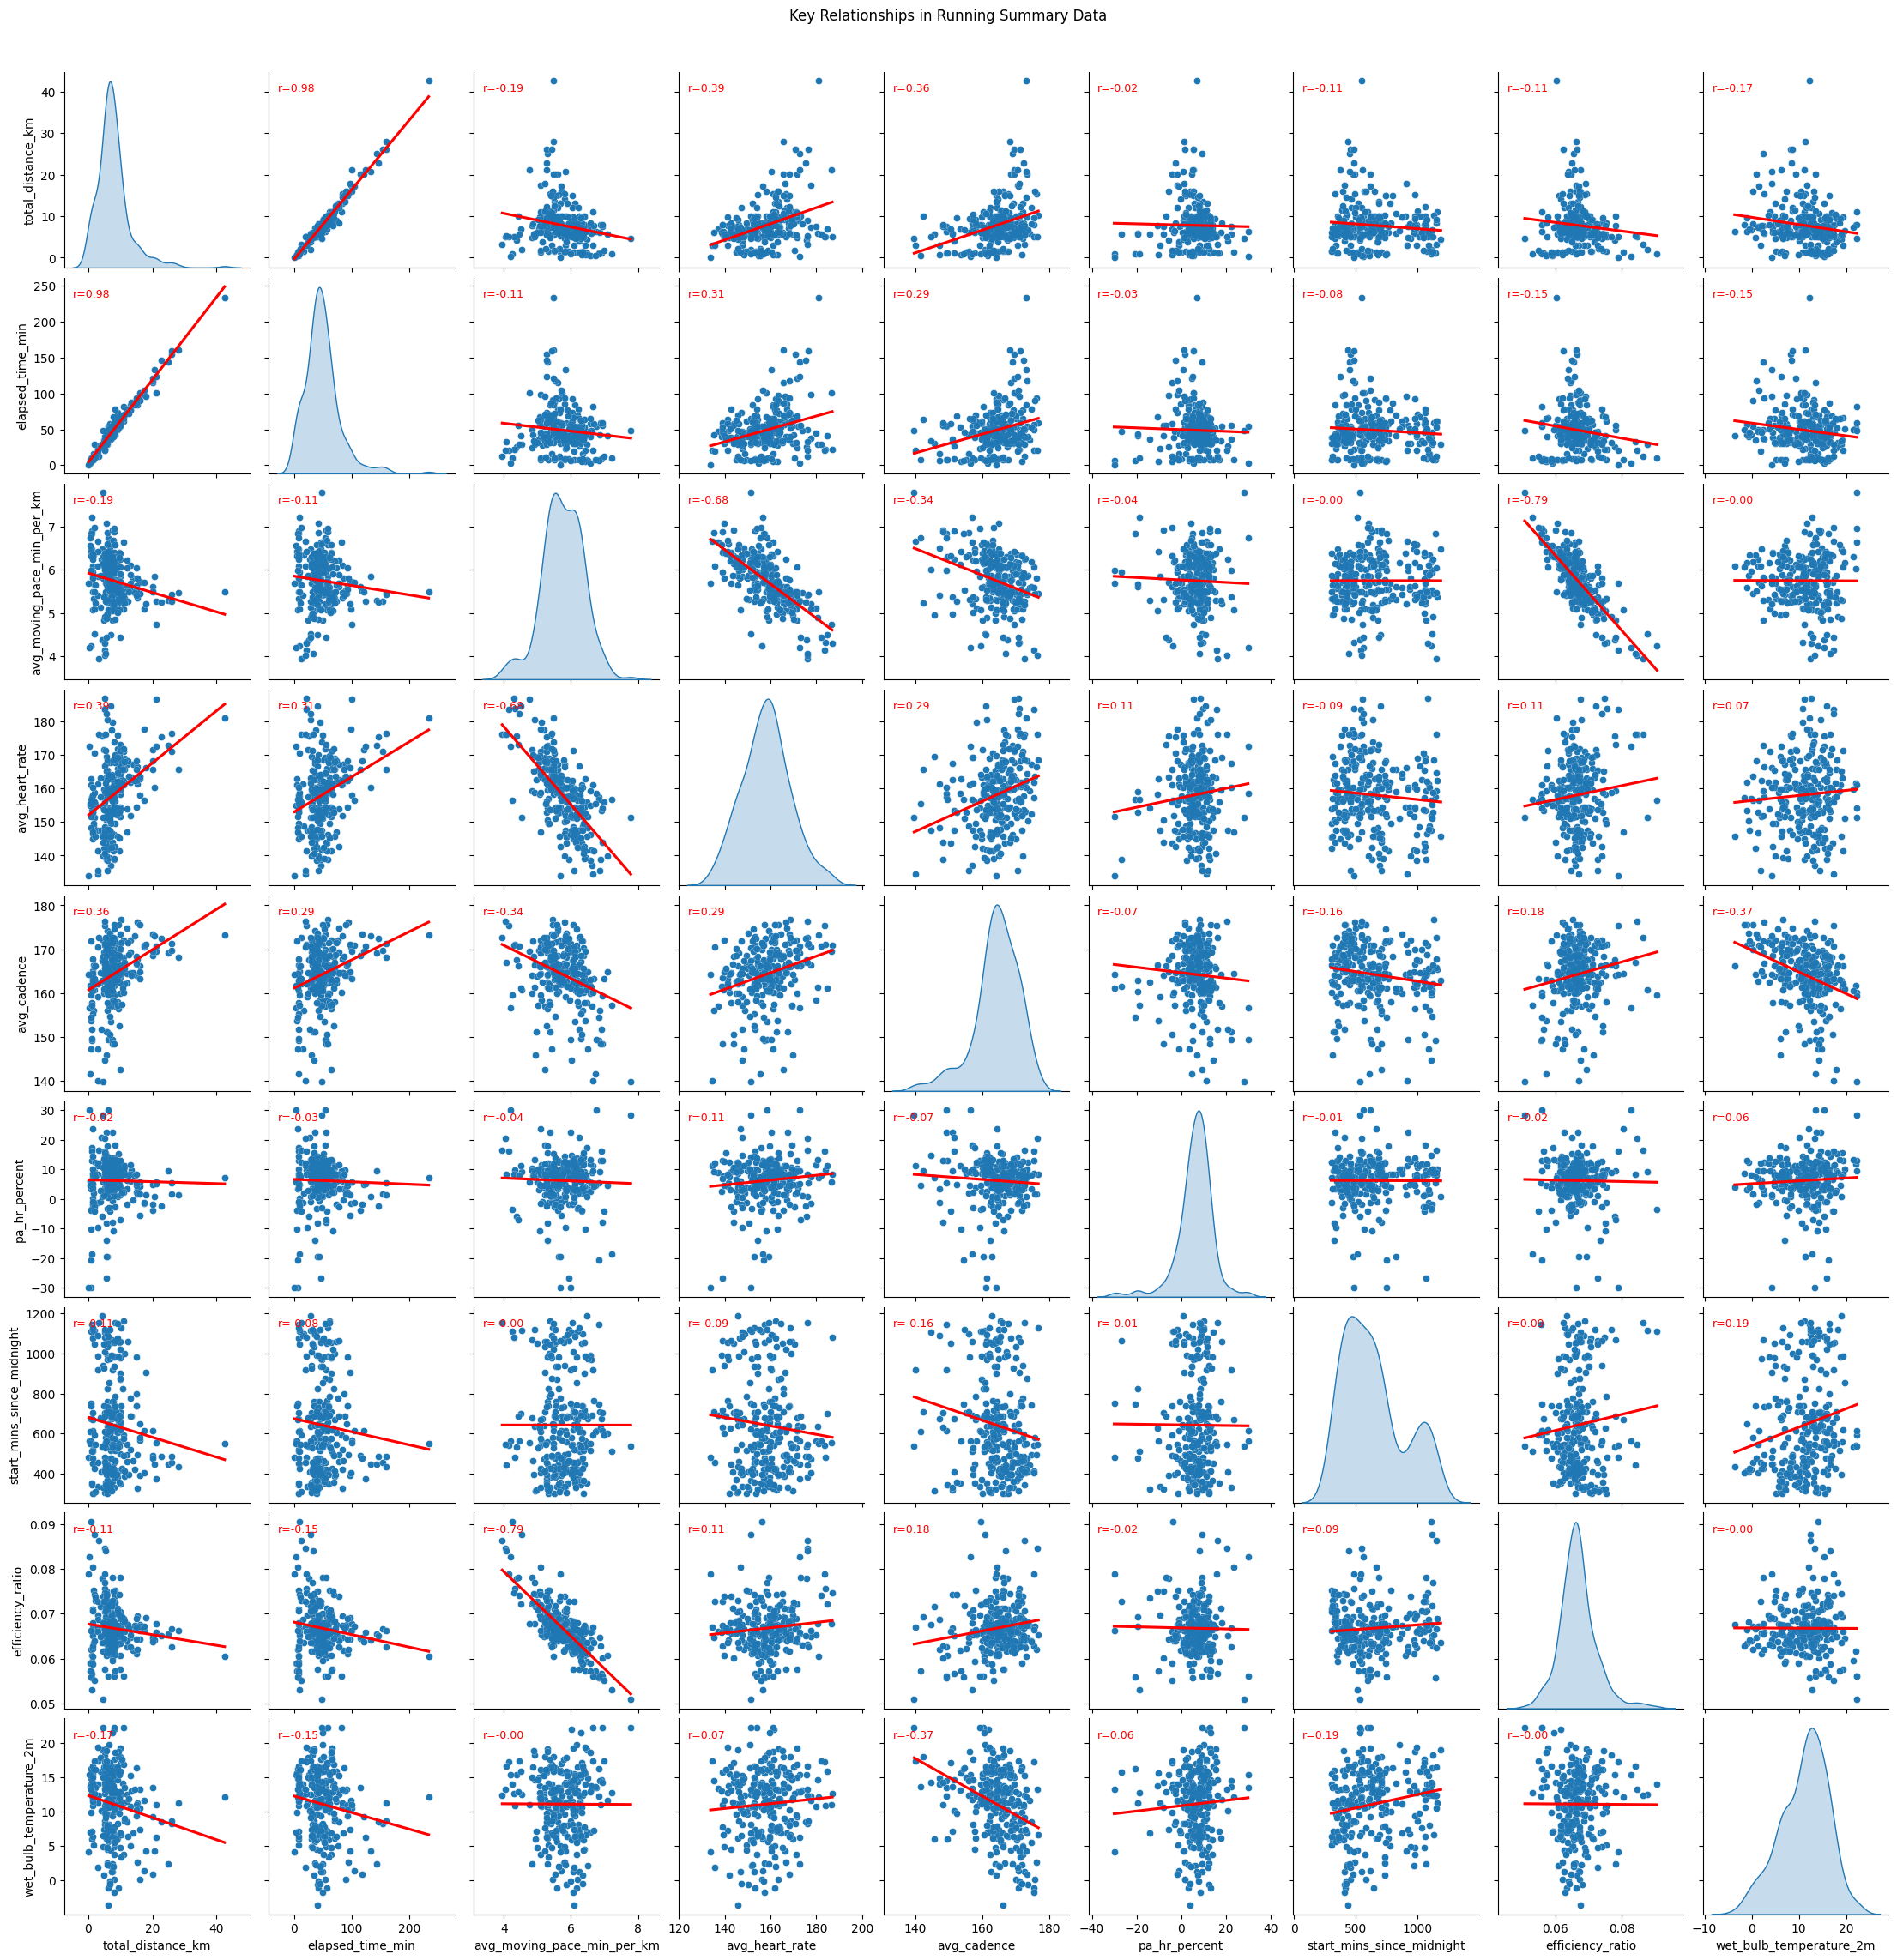

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# curated set of interesting metrics
cols = [
    "total_distance_km",
    "elapsed_time_min",
    "avg_moving_pace_min_per_km",
    "avg_heart_rate",
    "start_time_of_day",
    "avg_cadence",
    "pa_hr_percent",
    "start_mins_since_midnight",
    "efficiency_ratio",
    "wet_bulb_temperature_2m"
]
df_clean = running_summary_with_weather[cols].dropna()


def scatter_with_corr(x, y, **kwargs):
    ax = plt.gca()
    # plot regression line + scatter
    sns.regplot(x=x, y=y, scatter_kws={"alpha":0.5, "s":20}, line_kws={"color":"red"}, ci=None, ax=ax)
    # compute Pearson r
    if len(x) > 1 and len(y) > 1:
        r, p = pearsonr(x, y)
        ax.annotate(f"r={r:.2f}", xy=(0.05, 0.9), xycoords="axes fraction", fontsize=9, color="red")

# build pairplot with custom off-diagonal
g = sns.pairplot(df_clean[cols], diag_kind="kde")
g.map_offdiag(scatter_with_corr)

plt.suptitle("Key Relationships in Running Summary Data", y=1.02)
plt.show()


In [26]:
import statsmodels.api as sm

def correct_for_wbt(df, metric, wbt_col="wet_bulb_temperature_2m", reference=15.0):
    """
    Correct a training metric for wet-bulb temperature using linear regression.
    
    df: DataFrame with metric and wet-bulb temp columns
    metric: str, column to correct (e.g. 'pa_hr_percent')
    wbt_col: str, column with WBT values
    reference: float, reference WBT for correction
    
    Returns: Series with corrected values
    """
    mask = df[[metric, wbt_col]].dropna()
    if mask.empty:
        return pd.Series([None]*len(df), index=df.index)
    
    X = sm.add_constant(mask[wbt_col])
    y = mask[metric]
    model = sm.OLS(y, X).fit()
    
    beta = model.params[wbt_col]
    intercept = model.params["const"]
    
    # corrected = observed - beta * (WBT - reference)
    corrected = df[metric] - beta * (df[wbt_col] - reference)
    return corrected

# apply correction
running_summary_with_weather["pa_hr_percent_wbt_corrected"] = correct_for_wbt(
    running_summary_with_weather, "pa_hr_percent", "wet_bulb_temperature_2m", reference=15.0
)
running_summary_with_weather["efficiency_ratio_wbt_corrected"] = correct_for_wbt(
    running_summary_with_weather, "efficiency_ratio", "wet_bulb_temperature_2m", reference=15.0
)

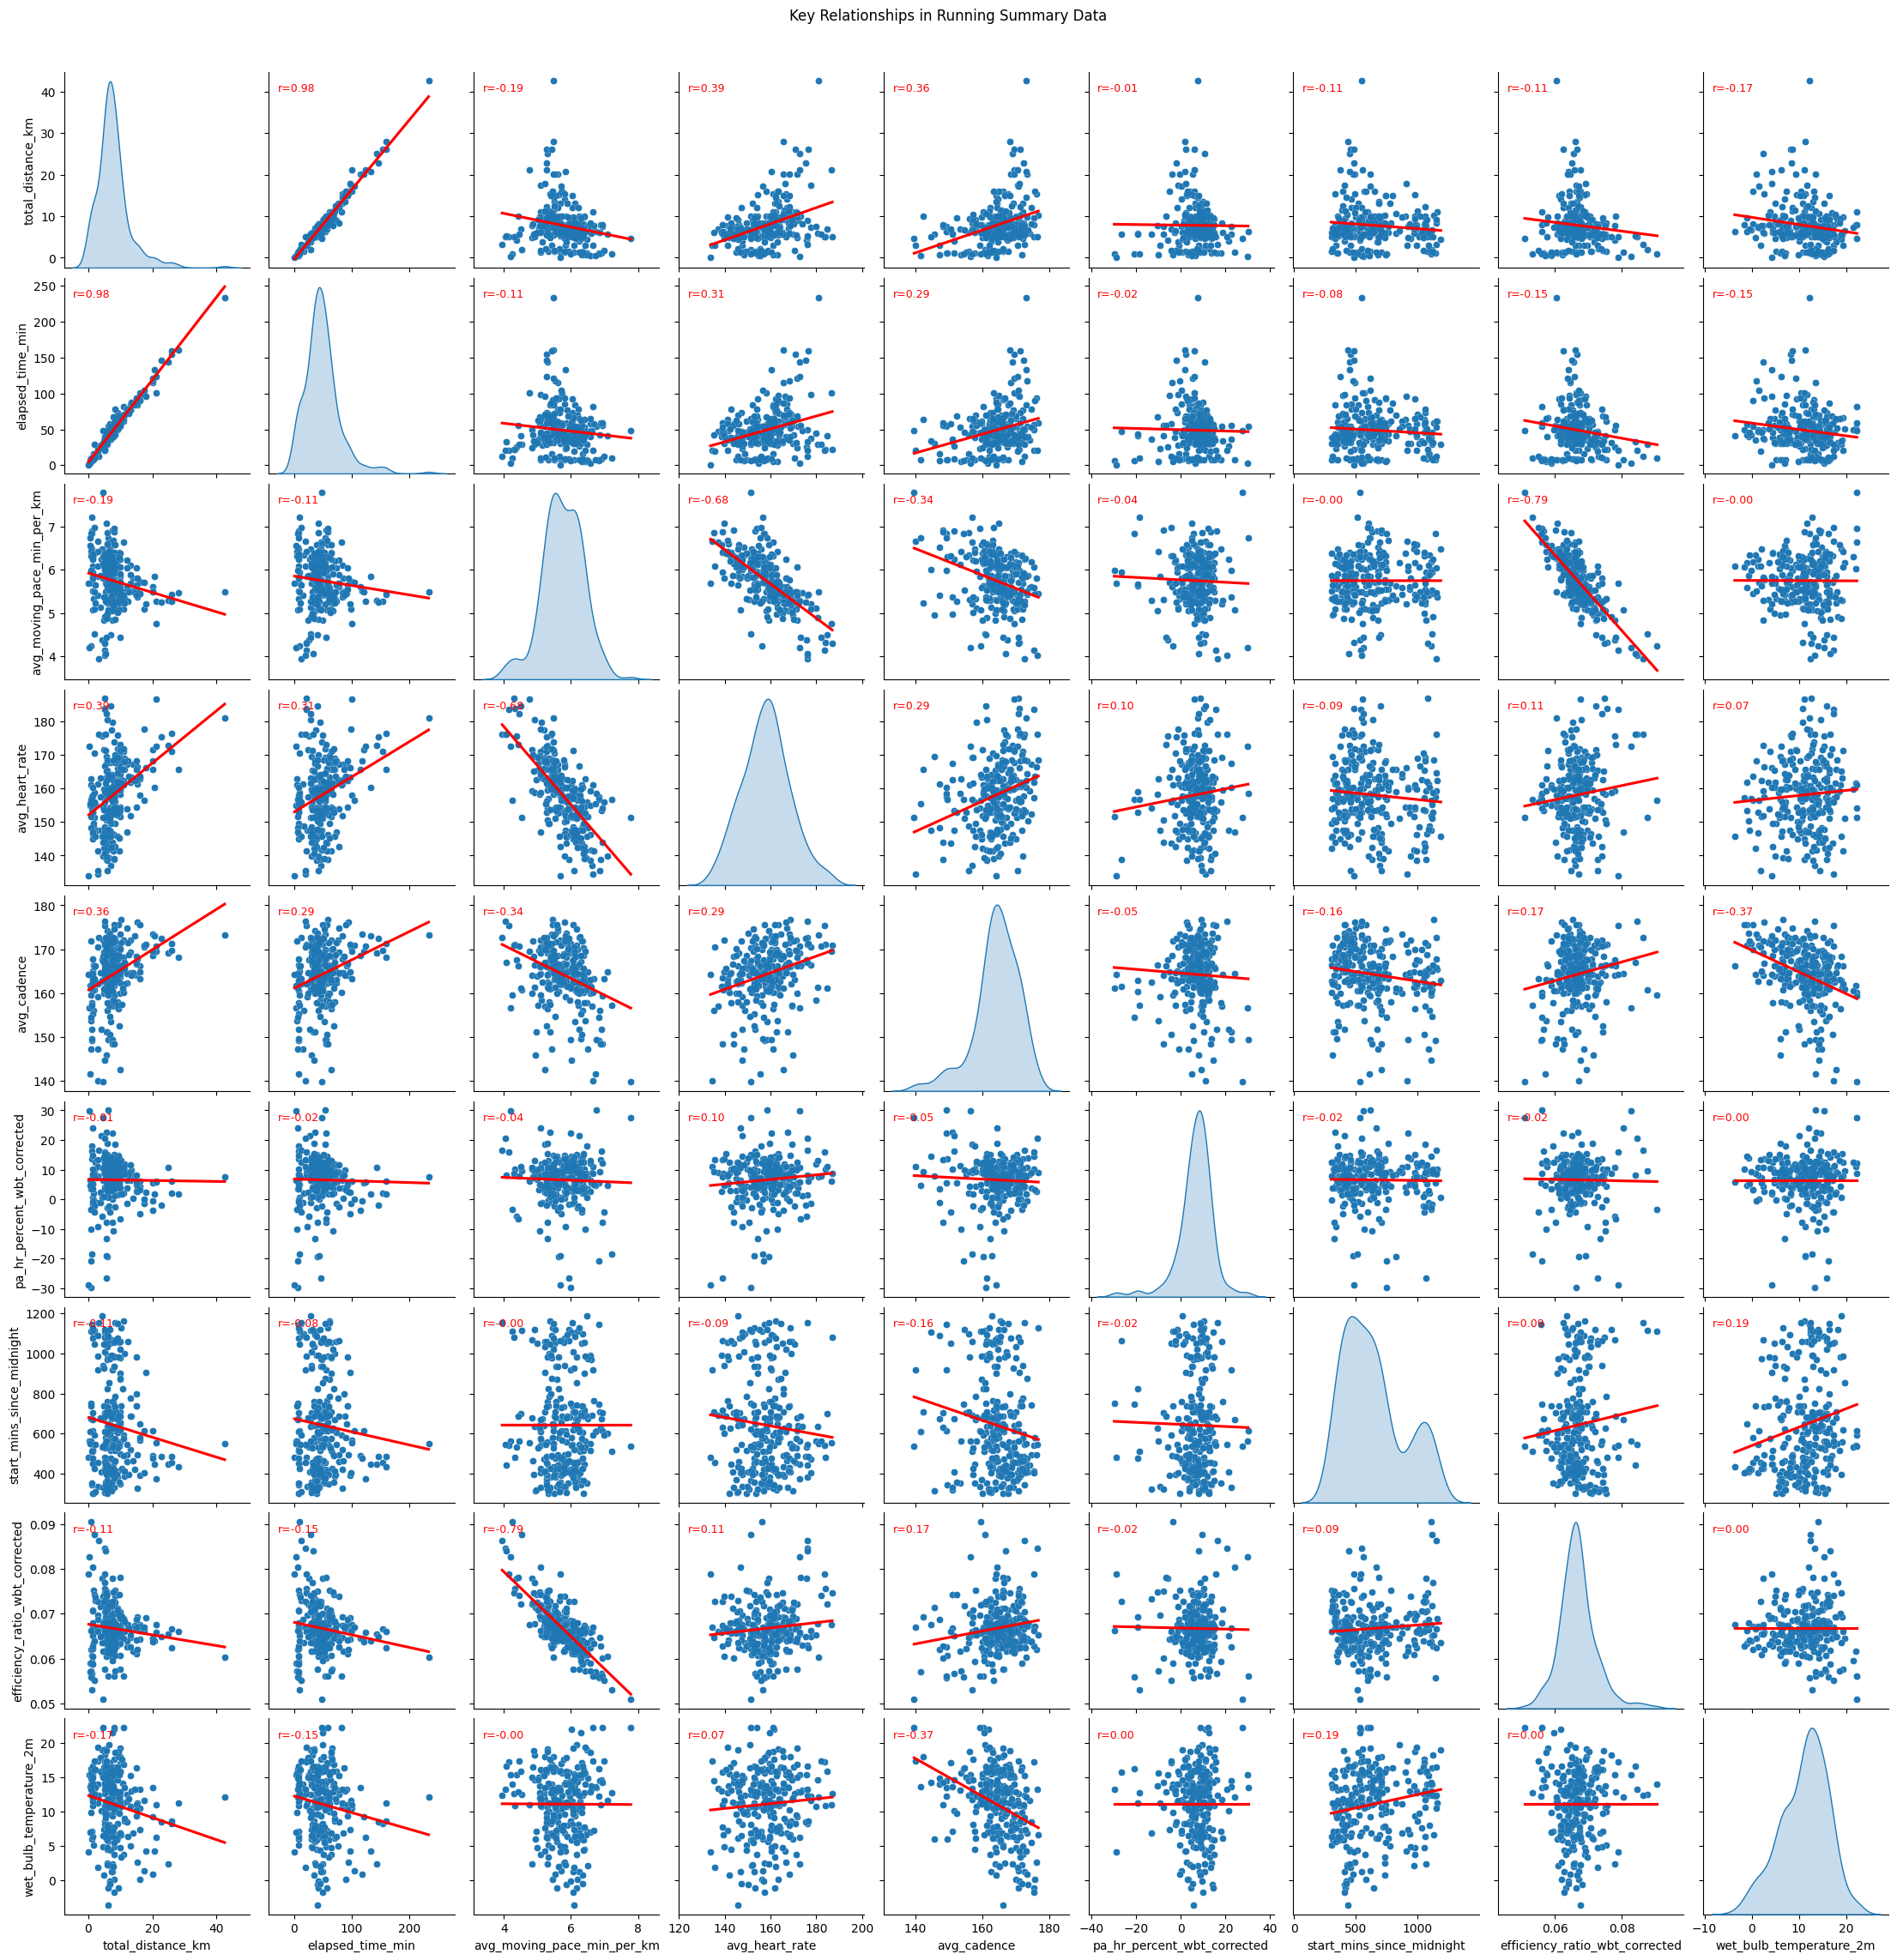

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# curated set of interesting metrics
cols = [
    "total_distance_km",
    "elapsed_time_min",
    "avg_moving_pace_min_per_km",
    "avg_heart_rate",
    "start_time_of_day",
    "avg_cadence",
    "pa_hr_percent_wbt_corrected",
    "start_mins_since_midnight",
    "efficiency_ratio_wbt_corrected",
    "wet_bulb_temperature_2m"
]
df_clean = running_summary_with_weather[cols].dropna()


def scatter_with_corr(x, y, **kwargs):
    ax = plt.gca()
    # plot regression line + scatter
    sns.regplot(x=x, y=y, scatter_kws={"alpha":0.5, "s":20}, line_kws={"color":"red"}, ci=None, ax=ax)
    # compute Pearson r
    if len(x) > 1 and len(y) > 1:
        r, p = pearsonr(x, y)
        ax.annotate(f"r={r:.2f}", xy=(0.05, 0.9), xycoords="axes fraction", fontsize=9, color="red")

# build pairplot with custom off-diagonal
g = sns.pairplot(df_clean[cols], diag_kind="kde")
g.map_offdiag(scatter_with_corr)

plt.suptitle("Key Relationships in Running Summary Data", y=1.02)
plt.show()


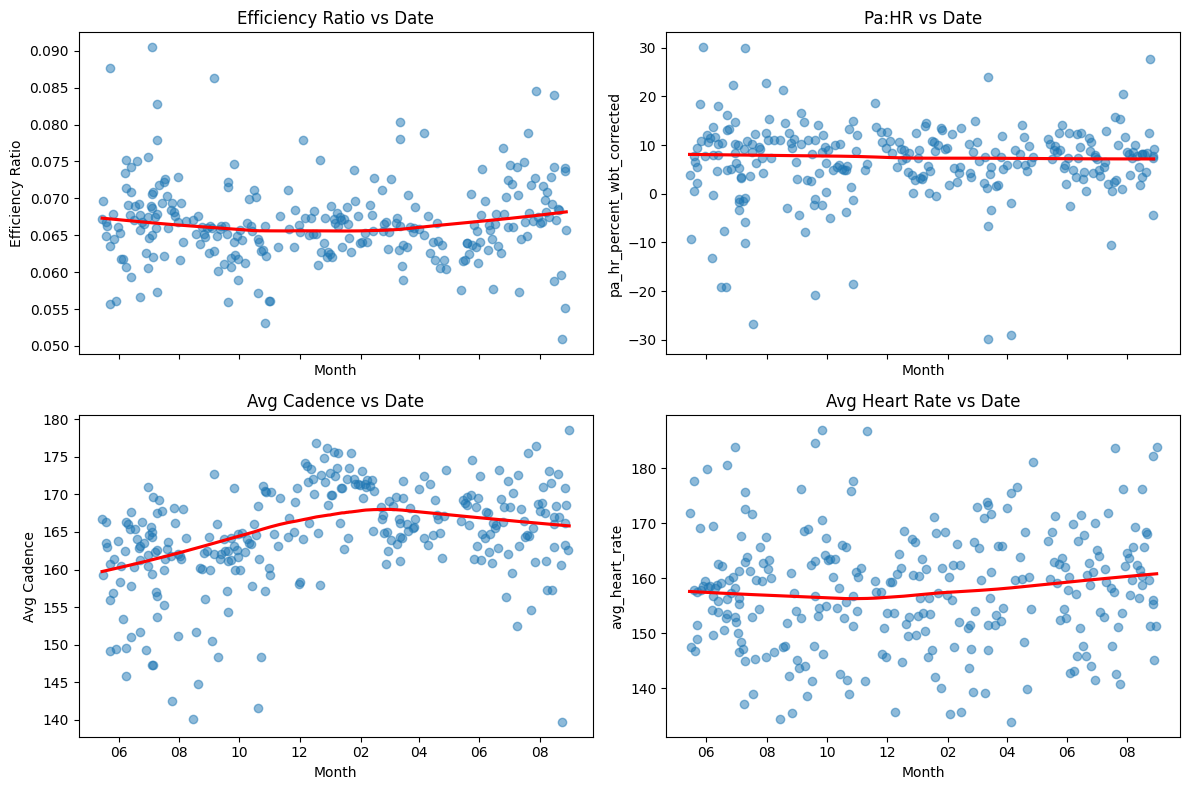

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# Ensure start_date is datetime
running_summary_with_weather["start_date"] = pd.to_datetime(running_summary_with_weather["start_date"])

# Convert dates → numeric ordinals
running_summary_with_weather["start_date_num"] = running_summary_with_weather["start_date"].map(pd.Timestamp.toordinal)

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)

# 1. Efficiency Ratio
sns.regplot(
    data=running_summary_with_weather,
    x="start_date_num", y="efficiency_ratio_wbt_corrected",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[0,0]
)
axes[0,0].set_title("Efficiency Ratio vs Date")
axes[0,0].set_ylabel("Efficiency Ratio")

# 2. Pa:HR
sns.regplot(
    data=running_summary_with_weather,
    x="start_date_num", y="pa_hr_percent_wbt_corrected",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[0,1]
)
axes[0,1].set_title("Pa:HR vs Date")

# 3. Avg Cadence
sns.regplot(
    data=running_summary_with_weather,
    x="start_date_num", y="avg_cadence",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[1,0]
)
axes[1,0].set_title("Avg Cadence vs Date")
axes[1,0].set_ylabel("Avg Cadence")

# 4. Avg HR
sns.regplot(
    data=running_summary_with_weather,
    x="start_date_num", y="avg_heart_rate",
    lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"},
    ax=axes[1,1]
)
axes[1,1].set_title("Avg Heart Rate vs Date")

# --- Shared date formatting for all x-axes ---
date_min = running_summary_with_weather["start_date"].min()
date_max = running_summary_with_weather["start_date"].max()
ticks = pd.date_range(date_min, date_max, freq="2ME")

for ax in axes.flat:
    ax.set_xlabel("Month")
    ax.set_xticks([d.toordinal() for d in ticks])
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%m"))

plt.tight_layout()
plt.show()


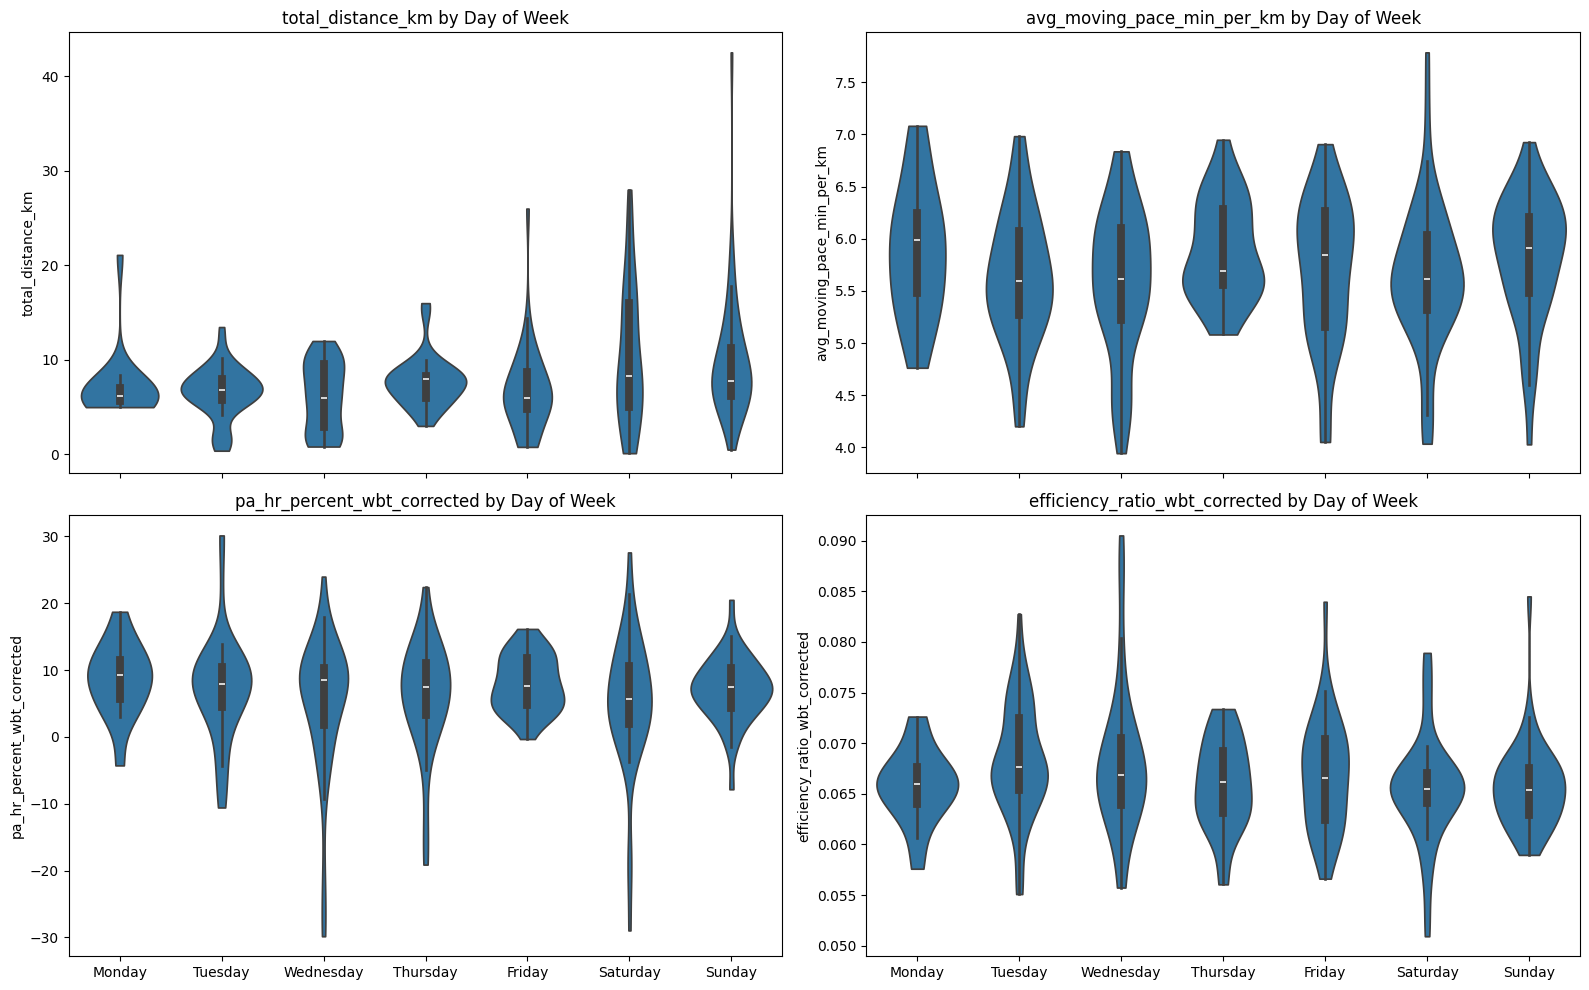

In [32]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
cols = [
    "total_distance_km",
    "avg_moving_pace_min_per_km",
    "pa_hr_percent_wbt_corrected",
    "efficiency_ratio_wbt_corrected",
]

df_plot = running_summary_with_weather.copy()
for c in cols:
    df_plot[c] = pd.to_numeric(df_plot[c], errors="coerce")

# make grid
ncols = 2
nrows = int(np.ceil(len(cols) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 10), sharex=True)

for ax, metric in zip(axes.flat, cols):
    sns.violinplot(
        data=df_plot,
        x="day_of_week", y=metric,
        order=order,
        ax=ax,
        inner="box",   # adds mini boxplot inside
        cut=0
    )
    ax.set_title(f"{metric} by Day of Week")
    ax.set_xlabel("")
    ax.set_ylabel(metric)

# remove unused axes if cols < nrows*ncols
for ax in axes.flat[len(cols):]:
    ax.remove()

plt.tight_layout()
plt.show()
